In [1]:
import numpy as np
import pandas as pd
# Visualizacao
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('resultados_classificacao.csv')
data.head(10)

,Arvore,RandomForest,KNN,SVM,R_Logist,Rede Neural
0,0.9870,0.9835,0.9800,0.9835,0.9475,0.9970
1,0.9840,0.9850,0.9800,0.9840,0.9465,0.9980
2,0.9905,0.9885,0.9800,0.9835,0.9470,0.9970
3,0.9880,0.9865,0.9800,0.9845,0.9460,0.9970
4,0.9885,0.9880,0.9810,0.9855,0.9465,0.9975
5,0.9885,0.9870,0.9785,0.9835,0.9465,0.9975
6,0.9880,0.9865,0.9800,0.9840,0.9470,0.9970
7,0.9875,0.9845,0.9805,0.9845,0.9480,0.9970
8,0.9870,0.9870,0.9810,0.9820,0.9465,0.9970
9,0.9870,0.9865,0.9810,0.9830,0.9465,0.9970


## Teste de Shapiro, ANOVA e Tukey

In [3]:
from scipy.stats import shapiro

In [4]:
p_values = [ shapiro(data[data.columns[i]])[1] for i in range(data.columns.size)]

In [5]:
for i in range(len(p_values)):
    print(f'{p_values[i]} | {data.columns[i]}')

0.2660514174971472 | Arvore
0.33725009309142506 | RandomForest
0.03494349635607794 | KNN
0.38433952657851406 | SVM
0.05193074013088575 | R_Logist
0.000729426682694957 | Rede Neural


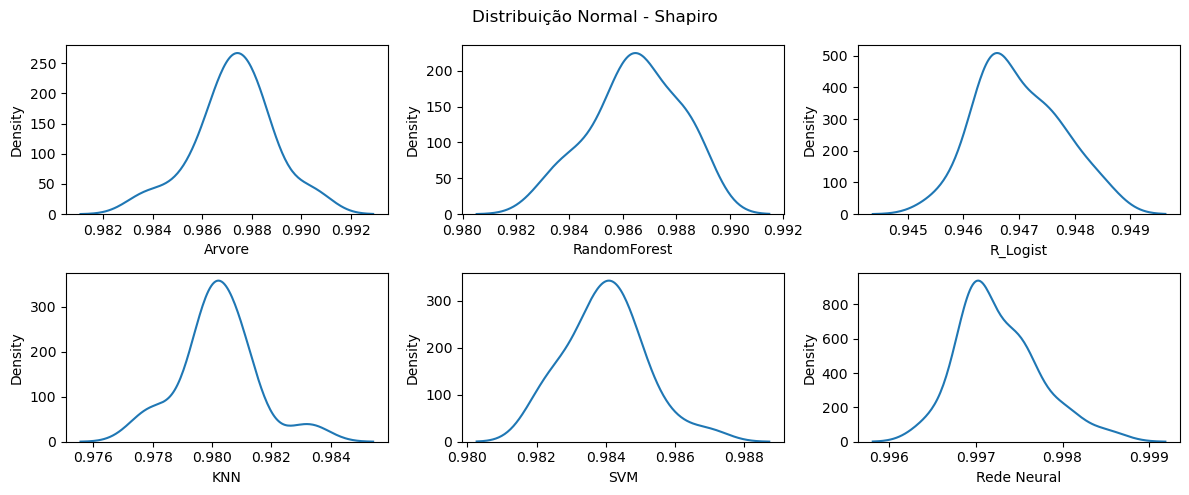

In [6]:
## Figure-level interface for drawing distribution plots onto a FacetGrid.
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,5))
plt.suptitle("Distribuição Normal - Shapiro")

sns.kdeplot(data['Arvore'], ax=ax[0, 0])  # Primeiro subplot
sns.kdeplot(data['RandomForest'], ax=ax[0, 1])  # Segundo subplot
sns.kdeplot(data['KNN'], ax=ax[1, 0])  # Terceiro subplot
sns.kdeplot(data['SVM'], ax=ax[1, 1])  # Quarto subplot
sns.kdeplot(data['R_Logist'], ax=ax[0, 2])  # Quinto subplot
sns.kdeplot(data['Rede Neural'], ax=ax[1, 2])  # Quarto subplot
plt.tight_layout()

Teste de Hipótese ANOVA  
`f_oneway(*samples, axis=0, nan_policy='propagate', keepdims=False) `



The one-way ANOVA tests the null hypothesis that two or more groups have
the same population mean.  The test is applied to samples from two or
more groups, possibly with differing sizes

In [7]:
from scipy.stats import f_oneway

In [8]:
resultados = [ data[data.columns[i]] for i in range(data.columns.size)]
resultados = np.asarray(resultados)

In [9]:
_ , p = f_oneway(*resultados)
print(f'{p=}')

p=2.0851447420097609e-193


Hipótese nula rejeitada. Dados são diferentes (os dados dos algoritmos são diferentes entre si). **Agora podermo

In [10]:
resultados_col = resultados.flatten()

**Teste de Tukey**

In [11]:
from statsmodels.stats.multicomp import MultiComparison

In [12]:
arvore_labels = ['arvore,'*30][0].split(',')
del arvore_labels[-1]

rdf_labels = ['random_forest,'*30][0].split(',')
del rdf_labels[-1]

knn_labels = ['knn,'*30][0].split(',')
del knn_labels[-1]

logistica_labels = ['logistica,'*30][0].split(',')
del logistica_labels[-1]

svm_labels = ['svm,'*30][0].split(',')
del svm_labels[-1]

rede_neural_labels = ['rede_neural,'*30][0].split(',')
del rede_neural_labels[-1]

In [13]:
labels = np.concatenate([arvore_labels, rdf_labels, knn_labels, logistica_labels, svm_labels, rede_neural_labels])

In [14]:
resultados_algoritmos = pd.DataFrame({'accuracy': resultados_col, 'algoritmo': labels})
resultados_algoritmos


,accuracy,algoritmo
0,0.9870,arvore
1,0.9840,arvore
2,0.9905,arvore
3,0.9880,arvore
4,0.9885,arvore
...,...,...
175,0.9980,rede_neural
176,0.9970,rede_neural
177,0.9965,rede_neural
178,0.9970,rede_neural


In [15]:
# Instanciando 
compara_algoritmos = MultiComparison(resultados_algoritmos['accuracy'], resultados_algoritmos['algoritmo'])

In [16]:
# Aplica o Tukey
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0071    0.0  -0.008 -0.0062   True
       arvore     logistica  -0.0033    0.0 -0.0042 -0.0024   True
       arvore random_forest  -0.0009 0.0775 -0.0018  0.0001  False
       arvore   rede_neural     0.01    0.0  0.0091  0.0109   True
       arvore           svm  -0.0403    0.0 -0.0412 -0.0394   True
          knn     logistica   0.0038    0.0  0.0029  0.0047   True
          knn random_forest   0.0062    0.0  0.0053  0.0072   True
          knn   rede_neural   0.0171    0.0  0.0162   0.018   True
          knn           svm  -0.0332    0.0 -0.0341 -0.0323   True
    logistica random_forest   0.0025    0.0  0.0016  0.0034   True
    logistica   rede_neural   0.0133    0.0  0.0124  0.0142   True
    logistica           svm   -0.037    0.0 -0.0379 -0.0361   

com `False`, os resultados estatísitico de um algoritmo não são superiores ao outro

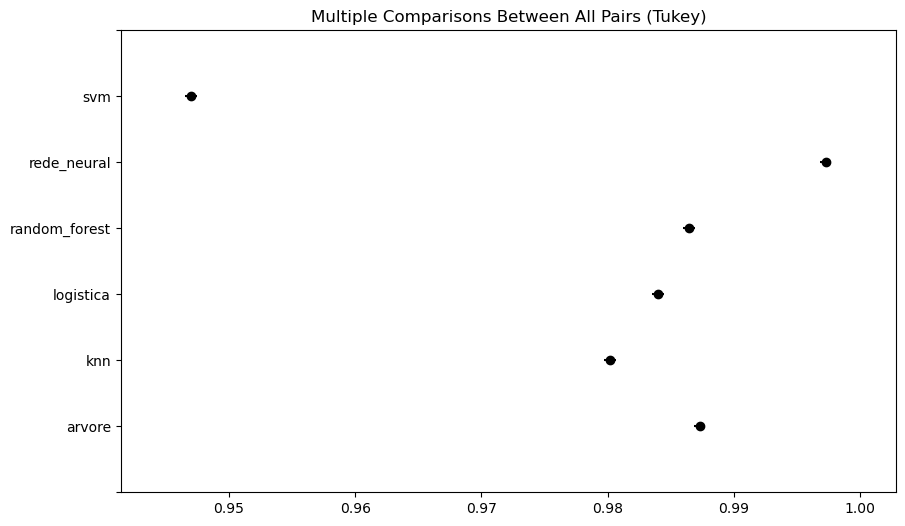

In [17]:
teste_estatistico.plot_simultaneous();